TP 2 IA: Clasificación de pistachos

In [1]:
#!pip3 install opencv-python
#!pip3 install tensorflow

In [34]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
x = [] # images as data
y = [] # 1 or 0 according to the x[i] pistacho type

In [4]:
class_label_encoding = {
    'Kirmizi_Pistachio': 0,
    'Siirt_Pistachio': 1
}

In [5]:
# https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html
full_dir = r"C:\Users\Rakki\Desktop\IA\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset"

for directory in os.listdir(full_dir):
    if('.txt' in directory): continue
    for file in os.listdir(full_dir+'/'+directory):
        image_path = full_dir+'/'+directory+'/'+file
        img = cv2.imread(image_path,0).astype('float32') # convert images as grayscale
        img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
        img/=255. # This is to have all point in a scale from 0 to 1. because RGB values varies from 0 to 255
        x.append(img)        
        y.append(class_label_encoding[directory]) # Set 1 or 0 for each pistacho type, based on directory folder
        
img[150] # example pistacho

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00653595, 0.00653595, 0.11154684,
       0.60871464, 0.8117647 , 0.8627451 , 0.8662309 , 0.8610022 ,
       0.8135076 , 0.77124184, 0.7176471 , 0.6244009 , 0.51372

In [6]:
img.shape

(200, 200)

In [7]:
x = np.array(x)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1) #add a 1 for the RGB channel amount
x.shape

(2148, 200, 200, 1)

In [9]:
y = np.array(y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1234)
len(y_train)

1503

In [11]:
# y_train.sum() gives all the Siirt_Pistachio since they were labeled with a 1

print('Train set')
print('class 0:', len(y_train) - y_train.sum()) 
print('class 1:', y_train.sum())

print()

print('Test set')
print('class 0:', len(y_test) - y_test.sum())
print('class 1:', y_test.sum())

Train set
class 0: 859
class 1: 644

Test set
class 0: 373
class 1: 272


In [12]:
model = Sequential()

## CHEQUEAR POR QUE AGREGA ESTO
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://keras.io/api/layers/convolution_layers/convolution2d/
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,'sigmoid'))

model.compile('Adam','binary_crossentropy',['accuracy'])

print(model.summary())

len(x_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                    

1503

In [20]:

history = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), batch_size=256, epochs=5)

Epoch 1/5
12/12 [==============================] - 114s 10s/step - loss: 0.2857 - accuracy: 0.8736 - val_loss: 0.3348 - val_accuracy: 0.8605
Epoch 2/5
12/12 [==============================] - 116s 10s/step - loss: 0.2648 - accuracy: 0.8882 - val_loss: 0.3214 - val_accuracy: 0.8698
Epoch 3/5
12/12 [==============================] - 115s 10s/step - loss: 0.2491 - accuracy: 0.8949 - val_loss: 0.3316 - val_accuracy: 0.8620
Epoch 4/5
12/12 [==============================] - 116s 10s/step - loss: 0.2286 - accuracy: 0.9035 - val_loss: 0.3092 - val_accuracy: 0.8853
Epoch 5/5
12/12 [==============================] - 113s 9s/step - loss: 0.2212 - accuracy: 0.9049 - val_loss: 0.3230 - val_accuracy: 0.8713


Analsis de resultados

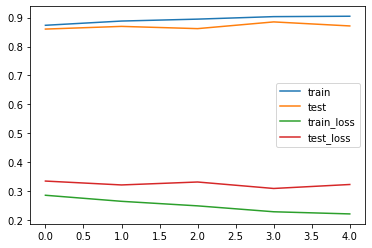

In [24]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [25]:
loss, acc = model.evaluate(np.array(x_test), np.array(y_test), verbose=0) 
print('Testing accuracy:', round(acc*100,3))
print('Testing loss:', round(loss,3))

Testing accuracy: 87.132
Testing loss: 0.323


In [30]:
from sklearn.metrics import confusion_matrix

p_pred= model.predict(x_test)

21/21 [==============================] - 10s 483ms/step


In [35]:
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


Confusion matrix

 [[315  58]
 [ 25 247]]

True Positives(TP) =  315

True Negatives(TN) =  247

False Positives(FP) =  58

False Negatives(FN) =  25


<AxesSubplot:>

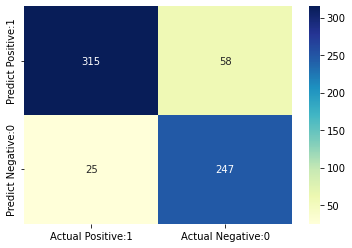

In [37]:
import seaborn as sns

cm = confusion_matrix(np.array(y_test), np.array(y_pred))
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize matrix with heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')